In [1]:
import sys
from collections import defaultdict
sys.path.append("..")

from plotting_tools import *

In [2]:
def get_household_sizes(person_filename):
    # Read person df
    df = pd.read_csv(person_filename, sep=',')
    # Only person and its home id is needed
    df = df[['puid', 'age', 'home_id']].groupby('home_id').size().value_counts().sort_index().reset_index(name='counts')
    # Calculate percentages
    df['percentage'] = df['counts'].transform(lambda x: 100 * x / x.sum())
    return df

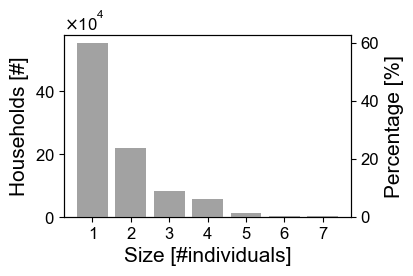

In [ ]:
person_csv = 'persons.csv'

df = get_household_sizes(person_csv)

panel_pos = [0.16, 0.2, 0.7, 0.7]
figsize = (4.1, 2.6)
dist_colors = [colors['Medium grey'] for i in range(len(df))] 
fig = plt.figure(figsize=figsize)
ax1 = fig.add_axes(panel_pos)
ax2 = ax1.twinx()
x_pos = [index+1 for index in range(len(df.index))]
ax1.set_xticks(x_pos, [i+1 for i in df.index])
ax1.bar([i+1 for i in df.index], df.counts, color=dist_colors)
ax1.set_xlabel('Size [#individuals]')
ax1.set_ylabel('Households [#]')
ax2.bar([i+1 for i in df.index], df.percentage, color=dist_colors)
ax2.set_ylabel('Percentage [%]')
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((4, 4))  # Scientific notation for 1e4
ax1.yaxis.set_major_formatter(formatter)
fig.savefig('hh_size_distribution.png', dpi=dpi)
plt.show()